   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


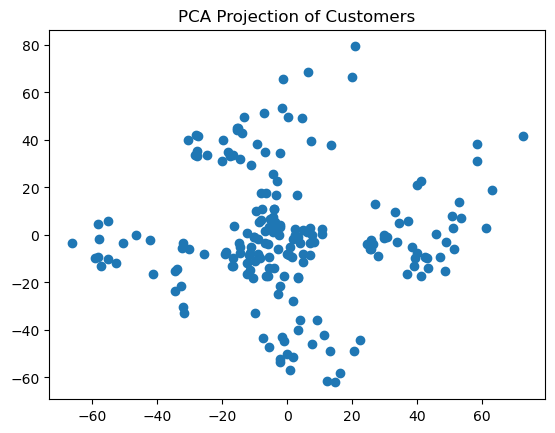

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("C:/Users/mr.venky/Downloads/Mall_Customers.csv")
print(df.head())

# Optional: reduce to 2D using PCA for visualization
X = df.iloc[:, 2:].values   # Selecting features (e.g., Age, Income, Spending Score)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Projection of Customers")
plt.show()


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

df["Cluster"] = labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        0  
3        2  
4        0  


C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\mr.venky\.conda\envs\myenv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\mr.venky\.conda\envs\myenv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mr.venky\.conda\envs\myenv\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mr.venky\.conda\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

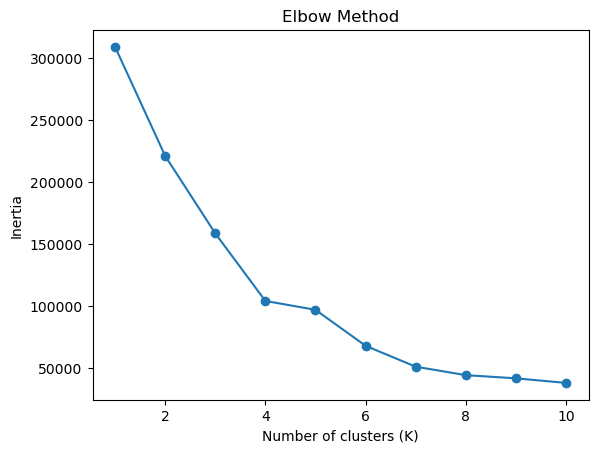

In [4]:
inertia = []
K_range = range(1,11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


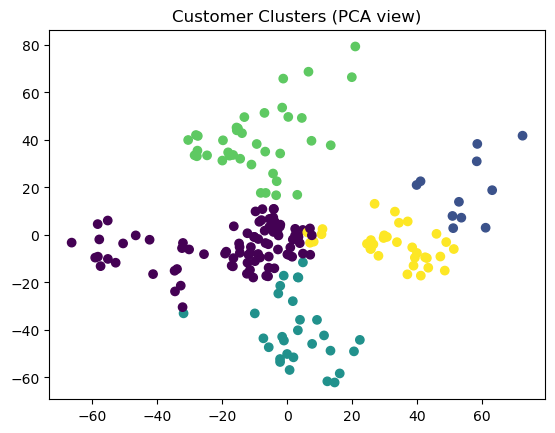

In [5]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis")
plt.title("Customer Clusters (PCA view)")
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.3575963460506624
